In [4]:
!pip install -qU soundfile librosa pyaudio audiomentations pydub matplotlib

In [4]:
import os
import requests
import tarfile

output_dir = r"C:\Users\jeeva\Videos\Efficient_word_net/test"
os.makedirs(output_dir, exist_ok=True)

file_urls = [
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/0.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/1.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/2.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/3.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/4.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/5.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/6.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/7.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/8.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/9.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/10.tar.gz",
    "https://huggingface.co/datasets/MLCommons/ml_spoken_words/resolve/main/data/wav/en/test/audio/11.tar.gz",
]



# Function to download a file
def download_file(url, output_dir):
    local_filename = os.path.join(output_dir, url.split("/")[-1])
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    return local_filename

# Function to extract .tar.gz files
def extract_tar_gz(file_path, extract_dir):
    with tarfile.open(file_path, "r:gz") as tar:
        tar.extractall(path=extract_dir)
        print(f"Extracted: {file_path}")
    # Check for .tar file and extract it
    tar_file = file_path.replace('.tar.gz', '.tar')
    if os.path.exists(tar_file):
        extract_tar(tar_file, extract_dir)

# Function to extract .tar files
def extract_tar(file_path, extract_dir):
    with tarfile.open(file_path, "r:") as tar:
        tar.extractall(path=extract_dir)
        print(f"Extracted: {file_path}")

# Download and extract all files
for url in file_urls:
    # Download the file
    downloaded_file = download_file(url, output_dir)
    print(f"Downloaded: {downloaded_file}")
    
    # Extract the file
    extract_tar_gz(downloaded_file, output_dir)


Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\0.tar.gz


C:\Users\jeeva\AppData\Local\Temp\ipykernel_2216\2554677718.py:38: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_dir)


Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\0.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\1.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\1.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\2.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\2.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\3.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\3.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\4.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\4.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\5.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\5.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\6.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\6.tar.gz
Downloaded: C:\Users\jeeva\Videos\Efficient_word_net/test\7.tar.gz
Extracted: C:\Users\jeeva\Videos\Efficient_word_net/test\7.tar.gz
Dow

In [1]:
import librosa
import librosa.display # for waveplots, spectograms, etc
import IPython.display as ipd # for playing files within pythonimport numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import soundfile as sf

In [2]:
SAMPLE_RATE = 16000
AUDIO_WINDOW = 1.0 #seconds
AUDIO_LENGTH = int(AUDIO_WINDOW * SAMPLE_RATE)

In [4]:
def randomCrop(x:np.array,length=AUDIO_LENGTH)->np.array :
    assert(x.shape[0]>length)
    frontBits = random.randint(0,x.shape[0]-length) 
    return x[frontBits:frontBits+length]

def addPadding(x:np.array,length=AUDIO_LENGTH)->np.array :
    assert(x.shape[0]<length)
    bitCountToBeAdded = length - x.shape[0]
    frontBits = random.randint(0,bitCountToBeAdded)
    #print(frontBits, bitCountToBeAdded-frontBits)
    new_x = np.append(np.zeros(frontBits),x)
    new_x = np.append(new_x,np.zeros(bitCountToBeAdded-frontBits))
    assert new_x.shape[0] == length, f"Error: Padded audio shape is {new_x.shape}, expected {length}"
    return new_x

def removeExistingPadding(x:np.array)->np.array:
    lastZeroBitBeforeAudio = 0 
    firstZeroBitAfterAudio = len(x)
    for i in range(len(x)):
        if x[i]==0:
            lastZeroBitBeforeAudio = i
        else:
            break
    for i in range(len(x)-1,1,-1):
        if x[i]==0:
            firstZeroBitAfterAudio = i
        else:
            break
    return x[lastZeroBitBeforeAudio:firstZeroBitAfterAudio]


def fixPaddingIssues(x:np.array,length=AUDIO_LENGTH)-> np.array:
    x = removeExistingPadding(x)
    #x = randomAugumentation(x)
    #print("Preprocessing Shape",x.shape[0])
    if(x.shape[0]>length):
        return randomCrop(x,length=length)
    elif(x.shape[0]<length):
        return addPadding(x,length=length)
    else:
        return x
    
def addNoise(x:np.array,noise:np.array,noise_factor = 0.4)-> np.array:
    assert(x.shape[0]==noise.shape[0])
    out = (1-noise_factor)*x/x.max() + noise_factor*(noise/noise.max())
    return out/out.max()

def splitNoiseFileToChunks(filename: str, target_folder: str, count=100, sr=16000):
    noiseAudio, _ = librosa.load(filename, sr=sr)
    if len(noiseAudio) <= AUDIO_LENGTH:
        print(f"Warning: Audio file {filename} is shorter than {AUDIO_LENGTH / SAMPLE_RATE} seconds. Skipping this file.")
        return  # Skip this file if it's too short
    
    for i in range(count):
        noiseAudioCrop = randomCrop(noiseAudio)  # This should now always work
        outFilePath = target_folder + "/" + (f"{'.'.join(filename.split('.')[:-1])}_{i}.wav").split("/")[-1]
        sf.write(outFilePath, noiseAudioCrop, sr, 'PCM_24')


In [5]:
from os import listdir, mkdir
from os.path import isdir
from os import system as run_sys_command
import librosa

# Define the source and target directories
source_dir = "./noise_subset"
target_dir = "./NoiseChunked"

# Create the target directory
mkdir(target_dir)

# List the 10 folders (folds) in the UrbanSound8K dataset
folds = listdir(source_dir)

# Iterate over each fold
for i, fold in enumerate(folds):
    source_path = f"{source_dir}/{fold}"  # Path to the current fold
    target_path = f"{target_dir}/{fold}"  # Path to the target folder for chunks
    
    print(f"{len(folds) - i} folds left to process.")
    
    if isdir(source_path):  # Check if the fold is a directory
        mkdir(target_path)  # Create a target folder for the current fold
        audioFiles = listdir(source_path)  # List all audio files in the current fold

        # Iterate over each audio file in the current fold
        for j, audioFile in enumerate(audioFiles):
            print(f"Processing {j + 1} out of {len(audioFiles)} audio files in {fold}.")
            srcFilePath = f"{source_path}/{audioFile}"  
            splitNoiseFileToChunks(srcFilePath, target_path)



10 folds left to process.
Processing 1 out of 50 audio files in air_conditioner.
Processing 2 out of 50 audio files in air_conditioner.
Processing 3 out of 50 audio files in air_conditioner.
Processing 4 out of 50 audio files in air_conditioner.
Processing 5 out of 50 audio files in air_conditioner.
Processing 6 out of 50 audio files in air_conditioner.
Processing 7 out of 50 audio files in air_conditioner.
Processing 8 out of 50 audio files in air_conditioner.
Processing 9 out of 50 audio files in air_conditioner.
Processing 10 out of 50 audio files in air_conditioner.
Processing 11 out of 50 audio files in air_conditioner.
Processing 12 out of 50 audio files in air_conditioner.
Processing 13 out of 50 audio files in air_conditioner.
Processing 14 out of 50 audio files in air_conditioner.
Processing 15 out of 50 audio files in air_conditioner.
Processing 16 out of 50 audio files in air_conditioner.
Processing 17 out of 50 audio files in air_conditioner.
Processing 18 out of 50 audio f

In [9]:
import random
from audiomentations import Compose, TimeStretch, PitchShift, Shift

augmentation_pipeline = Compose([
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_shift=-0.5, max_shift=0.5, p=0.5),  # Corrected Shift
])

#def randomAugumentation(x,sr=SAMPLE_RATE):
#    choice1 = random.randint(0,1)
#    choice2 = random.randint(0,1)
#    return Augumentations[choice1](
#        Augumentations[2+choice2](
#            x,
#            sample_rate=sr
#        ),
#        sample_rate=sr
#    )


In [54]:
import numpy as np
import tensorflow as tf
import math

LOG_MEL_MEAN = 1.4
LOG_MEL_STD = 1.184

# DFT matrix
def _dft_matrix(dft_length):
    omega = (0 + 1j) * 2.0 * np.pi / float(dft_length)
    return np.exp(omega * np.outer(np.arange(dft_length), np.arange(dft_length)))

# Naive real-input Fourier Transform by matmul
def _naive_rdft(signal_tensor, fft_length, padding='center'):
    complex_dft_matrix_kept_values = _dft_matrix(fft_length)[:(fft_length // 2 + 1), :].transpose()
    real_dft_tensor = tf.constant(np.real(complex_dft_matrix_kept_values).astype(np.float32), name='real_dft_matrix')
    imag_dft_tensor = tf.constant(np.imag(complex_dft_matrix_kept_values).astype(np.float32), name='imaginary_dft_matrix')
    
    signal_frame_length = signal_tensor.shape[-1]
    half_pad = (fft_length - signal_frame_length) // 2

    if padding == 'center':  # Center-padding
        pad_values = tf.concat([
            tf.zeros([tf.rank(signal_tensor) - 1, 2], tf.int32),
            [[half_pad, fft_length - signal_frame_length - half_pad]]
        ], axis=0)
    elif padding == 'right':  # Right-padding
        pad_values = tf.concat([
            tf.zeros([tf.rank(signal_tensor) - 1, 2], tf.int32),
            [[0, fft_length - signal_frame_length]]
        ], axis=0)

    padded_signal = tf.pad(signal_tensor, pad_values)

    # Check shapes after padding
    #print(f"Padded signal shape: {padded_signal.shape}")

    result_real_part = tf.matmul(padded_signal, real_dft_tensor)
    result_imag_part = tf.matmul(padded_signal, imag_dft_tensor)

    #print(f"Real part shape: {result_real_part.shape}, Imaginary part shape: {result_imag_part.shape}")
    
    return result_real_part, result_imag_part

def _fixed_frame(signal, frame_length, frame_step, first_axis=False):
    signal_shape = signal.shape.as_list()

    length_samples = signal_shape[0] if first_axis else signal_shape[-1]
    
    if length_samples <= 0:
        raise ValueError('fixed framing requires predefined constant signal length')

    num_frames = max(0, 1 + (length_samples - frame_length) // frame_step)

    outer_dimensions = signal_shape[:-1]
    result_shape = outer_dimensions + [num_frames, frame_length]

    subframe_length = math.gcd(frame_length, frame_step)
    subframes_per_frame = frame_length // subframe_length
    subframes_per_hop = frame_step // subframe_length
    num_subframes = length_samples // subframe_length

    trimmed_input_size = outer_dimensions + [num_subframes * subframe_length]
    subframe_shape = outer_dimensions + [num_subframes, subframe_length]
    
    subframes = tf.reshape(
        tf.slice(
            signal,
            begin=np.zeros(len(signal_shape), np.int32),
            size=trimmed_input_size), subframe_shape)

    frame_selector = np.reshape(np.arange(num_frames) * subframes_per_hop, [num_frames, 1])
    subframe_selector = np.reshape(np.arange(subframes_per_frame), [1, subframes_per_frame])

    selector = frame_selector + subframe_selector
    frames = tf.reshape(tf.gather(subframes, selector.astype(np.int32), axis=-2), result_shape)

    #print(f"Framed signal shape: {frames.shape}")
    return frames

def _stft_tflite(signal, frame_length, frame_step, fft_length):
    window = tf.reshape(
        tf.constant(
            (0.5 - 0.5 * np.cos(2 * np.pi * np.arange(0, 1.0, 1.0 / frame_length))
            ).astype(np.float32),
            name='window'), [1, frame_length])
    
    framed_signal = _fixed_frame(signal, frame_length, frame_step, first_axis=False)
    framed_signal *= window

    real_spectrogram, imag_spectrogram = _naive_rdft(framed_signal, fft_length)

    #print(f"STFT real part shape: {real_spectrogram.shape}, STFT imag part shape: {imag_spectrogram.shape}")
    
    return real_spectrogram, imag_spectrogram

def _stft_magnitude_tflite(signals, frame_length, frame_step, fft_length):
    real_stft, imag_stft = _stft_tflite(signals, frame_length, frame_step, fft_length)
    stft_magnitude = tf.sqrt(tf.add(real_stft * real_stft, imag_stft * imag_stft), name='magnitude_spectrogram')

    #print(f"STFT magnitude shape: {stft_magnitude.shape}")
    
    return stft_magnitude

def build_mel_calculation_graph(waveform):
    with tf.name_scope('log_mel_features'):
        window_length_samples = 400
        hop_length_samples = 160
        MEL_BANDS = 64
        SAMPLE_RATE = 16000
        LOG_OFFSET = 0.001
        MEL_MIN_HZ = 50
        MEL_MAX_HZ = 8000
        fft_length = 2 ** int(np.ceil(np.log(window_length_samples) / np.log(2.0)))
        num_spectrogram_bins = fft_length // 2 + 1

        magnitude_spectrogram = _stft_magnitude_tflite(
            signals=waveform, 
            frame_length=window_length_samples, 
            frame_step=hop_length_samples, 
            fft_length=fft_length)

        linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
            num_mel_bins=MEL_BANDS,
            num_spectrogram_bins=num_spectrogram_bins,
            sample_rate=SAMPLE_RATE,
            lower_edge_hertz=MEL_MIN_HZ,
            upper_edge_hertz=MEL_MAX_HZ)

        mel_spectrogram = tf.matmul(magnitude_spectrogram, linear_to_mel_weight_matrix)
        log_mel_spectrogram = (tf.math.log(
            mel_spectrogram + LOG_OFFSET) - LOG_MEL_MEAN) / LOG_MEL_STD

        #print(f"Log mel spectrogram shape: {log_mel_spectrogram.shape}")
        return np.expand_dims(log_mel_spectrogram, axis=-1)

# Test the build function
t = np.random.random(16000)
t = tf.constant(t, dtype=tf.float32)
t = build_mel_calculation_graph(t)

print(t.shape)


(98, 64, 1)


In [87]:
from enum import Enum
import random
import os
import numpy as np
import tensorflow as tf
import librosa

# Helper function to omit hidden files
def omitHiddenFiles(inpArray):
    return [x for x in inpArray if '.' != x[0]]

class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, chunkedNoisePath, datasetPath,
                 batch_size=16,
                 training_generator=True,
                 max_noise_factor=0.2,
                 min_noise_factor=0.05,
                 sampling_rate=16000,
                 spectrogram=True,
                 shuffle=True,
                 print_words=False):
    
        self.batch_size = batch_size
        self.spectrogram = spectrogram
        self.shuffle = shuffle
        self.sampling_rate = sampling_rate
        self.chunkedNoisePath = chunkedNoisePath
        self.typesOfNoise = omitHiddenFiles(os.listdir(self.chunkedNoisePath))
        self.datasetPath = datasetPath
        self.max_noise_factor = max_noise_factor
        self.min_noise_factor = min_noise_factor
        self.wordsInDataset = omitHiddenFiles(os.listdir(datasetPath))
        self.print_words = print_words
        countOfWords = len(self.wordsInDataset)

        if training_generator:
            self.wordsInDataset = self.wordsInDataset[:int(0.9 * countOfWords)]
            print("Train size: ", len(self.wordsInDataset))
        else:
            self.wordsInDataset = self.wordsInDataset[int(0.9 * countOfWords):]
            print("Test size: ", len(self.wordsInDataset))

        # Shuffle the dataset
        self.wordsInDataset = random.sample(self.wordsInDataset, len(self.wordsInDataset))

        self.n = 2 * len(self.wordsInDataset)  # Positive and negative pairs

    def on_epoch_end(self):
        # Randomizing word order on epoch end
        self.wordsInDataset = random.sample(self.wordsInDataset, len(self.wordsInDataset))
    
    def giveJoinedAudio(self, word1: str, word2: str):
        if self.print_words:
            print(word1, word2)
        if word1 == word2:
            sample1, sample2 = random.sample(omitHiddenFiles(os.listdir(self.datasetPath + "/" + word1)), 2)
        else:
            sample1 = random.choice(omitHiddenFiles(os.listdir(self.datasetPath + "/" + word1)))
            sample2 = random.choice(omitHiddenFiles(os.listdir(self.datasetPath + "/" + word2)))

        voiceVector1, _ = librosa.load(self.datasetPath + "/" + word1 + "/" + sample1, sr=self.sampling_rate)
        voiceVector2, _ = librosa.load(self.datasetPath + "/" + word2 + "/" + sample2, sr=self.sampling_rate)

        # Padding
        voiceVector1 = fixPaddingIssues(voiceVector1)
        voiceVector2 = fixPaddingIssues(voiceVector2)

        # Noise generation
        randomNoiseType1, randomNoiseType2 = random.sample(self.typesOfNoise, 2)
        randomNoise1 = random.choice(omitHiddenFiles(os.listdir(self.chunkedNoisePath + "/" + randomNoiseType1 + "/")))
        randomNoise2 = random.choice(omitHiddenFiles(os.listdir(self.chunkedNoisePath + "/" + randomNoiseType2 + "/")))

        noiseVector1, _ = librosa.load(self.chunkedNoisePath + "/" + randomNoiseType1 + "/" + randomNoise1, sr=self.sampling_rate)
        noiseVector2, _ = librosa.load(self.chunkedNoisePath + "/" + randomNoiseType2 + "/" + randomNoise2, sr=self.sampling_rate)

        # Noise factors
        randomNoiseFactor1 = random.uniform(self.min_noise_factor, self.max_noise_factor)
        randomNoiseFactor2 = random.uniform(self.min_noise_factor, self.max_noise_factor)

        voice_with_noise1 = addNoise(voiceVector1, noiseVector1, randomNoiseFactor1)
        voice_with_noise2 = addNoise(voiceVector2, noiseVector2, randomNoiseFactor2)

        if self.spectrogram:
            voice_with_noise_spectrogram1 = build_mel_calculation_graph(tf.constant(voice_with_noise1, dtype=tf.float32))
            voice_with_noise_spectrogram2 = build_mel_calculation_graph(tf.constant(voice_with_noise2, dtype=tf.float32))

            # Check if spectrograms are valid
            if voice_with_noise_spectrogram1.shape[1] > 0 and voice_with_noise_spectrogram2.shape[1] > 0:
                return np.array([voice_with_noise_spectrogram1, voice_with_noise_spectrogram2])
            else:
                raise ValueError("Generated spectrogram is empty!")

        return np.array([voice_with_noise1, voice_with_noise2])

    def __getitem__(self, index):
        firstPairIndex = index * self.batch_size
        X1, X2, Y = [], [], []

        for i in range(firstPairIndex, firstPairIndex + self.batch_size):
            x_data = self.giveJoinedAudio(
                self.wordsInDataset[i // 2],
                self.wordsInDataset[(i // 2 + i % 2) % (self.n // 2)]
                )
            X1.append(x_data[0])  # First audio (X1)
            X2.append(x_data[1])  # Second audio (X2)
            Y.append(1.0 if i % 2 == 0 else 0.0)  # Labels

        # Stack arrays for output
        X1 = np.array(X1)
        X2 = np.array(X2)
        Y = np.array(Y)

    
        # Return a tuple where the first element is a list of two inputs
        return (X1, X2), Y  # Return two inputs and the labels


    def __len__(self):
        return self.n // self.batch_size


In [88]:
chunkedNoisePath = r"C:\Users\jeeva\Videos\Efficient_word_net\NoiseChunked"
datasetPath = r"C:\Users\jeeva\Videos\Efficient_word_net\test"

giveSpectrogram = False

generator = CustomDataGen(
    chunkedNoisePath,
    datasetPath,
    batch_size = 2,
    max_noise_factor=0.18,
    min_noise_factor=0.12, 
    spectrogram = giveSpectrogram,
    print_words=True
    )

X1,Y1 = generator[64]
data1 = X1[0][0]
data2 = X1[0][1]

print(data1.shape)

ipd.Audio(np.concatenate((data1,data2)),rate=SAMPLE_RATE)


Train size:  21157
subgroups subgroups
subgroups posed
(16000,)


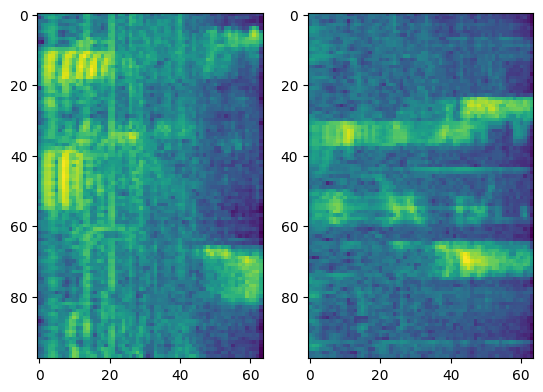

In [89]:
fig , ax = plt.subplots(1,2)
ax[0].imshow(
    build_mel_calculation_graph(tf.constant(data1,dtype=tf.float32))[...,0]
    )
ax[1].imshow(
    build_mel_calculation_graph(tf.constant(data2,dtype=tf.float32))[...,0]
    )

In [111]:
#inpShape=(98,64,1)
#model = tf.keras.applications.EfficientNetB0(include_top=False,weights=None,input_shape=inpShape)
#model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36      │ (None, 98, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 104, 70,   │          0 │ input_layer_36[0… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 49, 32,    │      3,200 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 49, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 49, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 51, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 25, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 25, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 25, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 25, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 25, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 25, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 25, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 23,581,440 (89.96 MB)

 Trainable params: 23,528,320 (89.75 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [112]:
#def l2_reg_output(x):
#    return tf.keras.backend.l2_normalize(x, axis=1)

#outputLayer = model.get_layer('conv4_block6_out').output  

#x = tf.keras.layers.Conv2D(32, 3, padding="same", name="extra_conv1", kernel_regularizer="l2")(outputLayer)
#x = tf.keras.layers.BatchNormalization()(x)
#x = tf.keras.layers.MaxPooling2D()(x)
#x = tf.keras.layers.Conv2D(64, 3, padding="same", name="extra_conv2", kernel_regularizer="l2")(x)
#x = tf.keras.layers.AveragePooling2D(pool_size=(x.shape[1]//2, x.shape[2]//2), strides=None, padding="valid")(x)
#x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dense(128, kernel_regularizer="l2")(x)

#x = tf.keras.layers.Lambda(l2_reg_output)(x)

#baseNetwork = tf.keras.Model(inputs=model.input, outputs=x, name="basemodel")
#baseNetwork.summary()

Model: "basemodel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36      │ (None, 98, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 104, 70,   │          0 │ input_layer_36[0… │
│ (ZeroPadding2D)     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 49, 32,    │      3,200 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 49, 32,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 49, 32,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 51, 34,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 25, 16,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 25, 16,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 25, 16,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 25, 16,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 25, 16,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 25, 16,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 25, 16,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 25, 16,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 25, 16,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 25, 16,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 25, 16,    │      1,024 │ conv2_block1_3_c

 Total params: 8,945,760 (34.13 MB)

 Trainable params: 8,915,104 (34.01 MB)

 Non-trainable params: 30,656 (119.75 KB)

In [113]:
def triplet_loss(y_true,y_pred):
    match_loss =  y_true * -2.0 * tf.math.log( 1 - y_pred/2 ) 
    mismatch_loss =  tf.maximum((1 - y_true) * ( -tf.math.log(y_pred/0.2) ) ,0)

    return tf.reduce_mean( match_loss + mismatch_loss )

def accuracy(y_true ,y_pred):
    threshold_check = tf.cast(tf.less_equal(y_pred,0.2),dtype=tf.float32)
    return tf.keras.metrics.binary_accuracy(y_true,threshold_check)

##Test code
t = tf.constant((1.0,1.0,1.0,1.0,1.0,1.0))
q = t - 0

print(triplet_loss(t,q))
print(accuracy(t,q))

tf.Tensor(1.3862944, shape=(), dtype=float32)
tf.Tensor([0. 0. 0. 0. 0. 0.], shape=(6,), dtype=float32)


## Resnet - 50

In [138]:
import tensorflow as tf

inpShape = (98, 64, 1)  # Original input shape (1 channel)

# Define a lambda layer to replicate the single channel 3 times
input_a = tf.keras.layers.Input(shape=inpShape)
input_b = tf.keras.layers.Input(shape=inpShape)

# Replicate the input to create 3 channels (convert 1 channel to 3)
replicate_a = tf.keras.layers.Lambda(lambda x: tf.keras.backend.repeat_elements(x, 3, axis=-1))(input_a)
replicate_b = tf.keras.layers.Lambda(lambda x: tf.keras.backend.repeat_elements(x, 3, axis=-1))(input_b)

# Load ResNet50 and use the replicated 3-channel inputs
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(98, 64, 3))

for layer in base_model.layers[:-20]:  
    layer.trainable = False


# Add custom layers on top of ResNet50
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, kernel_regularizer='l2')(x)
x = tf.keras.layers.Lambda(lambda x: tf.keras.backend.l2_normalize(x, axis=1))(x)

# Define base network for the Siamese model
base_network = tf.keras.Model(inputs=base_model.input, outputs=x)

# Apply the base network to both inputs
embedding_a = base_network(replicate_a)
embedding_b = base_network(replicate_b)

# Compute the Euclidean distance between the two embeddings
distance = tf.keras.layers.Lambda(lambda embeddings: tf.keras.backend.sqrt(tf.keras.backend.sum(tf.keras.backend.square(embeddings[0] - embeddings[1]), axis=-1)))(
    [embedding_a, embedding_b]
)
def triplet_loss(y_true,y_pred):
    match_loss =  y_true * -2.0 * tf.math.log( 1 - y_pred/2 ) 
    mismatch_loss =  tf.maximum((1 - y_true) * ( -tf.math.log(y_pred/0.2) ) ,0)
    return tf.reduce_mean( match_loss + mismatch_loss )

def accuracy(y_true ,y_pred):
    threshold_check = tf.cast(tf.less_equal(y_pred,0.2),dtype=tf.float32)
    return tf.keras.metrics.binary_accuracy(y_true,threshold_check)
# Create the Siamese model
siamese_model = tf.keras.Model(inputs=[input_a, input_b], outputs=distance)

# Compile the model
siamese_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=triplet_loss, metrics=[accuracy])

# Callbacks for training
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=r"C:\Users\jeeva\Videos\Efficient_word_net\Checkpoints\model-{epoch:02d}-loss_{loss:.3f}_val_acc{val_accuracy:.3f}.keras", 
        monitor='val_accuracy',
        save_best_only=False
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='loss', factor=0.1, patience=2, min_lr=1e-6
    ),
]
# Train the model with the adjusted generators
history = siamese_model.fit(
    training_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=my_callbacks
)


Epoch 1/10


c:\Users\jeeva\Videos\Efficient_word_net\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_3496', 'keras_tensor_3497']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1322/1322 ━━━━━━━━━━━━━━━━━━━━ 3619s 3s/step - accuracy: 0.5703 - loss: 1.1916 - val_accuracy: 0.6383 - val_loss: 0.1439 - learning_rate: 1.0000e-04
Epoch 2/10
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 2910s 2s/step - accuracy: 0.6666 - loss: 0.1354 - val_accuracy: 0.6710 - val_loss: 0.1270 - learning_rate: 1.0000e-04
Epoch 3/10
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 2809s 2s/step - accuracy: 0.6918 - loss: 0.1226 - val_accuracy: 0.7125 - val_loss: 0.1198 - learning_rate: 1.0000e-04
Epoch 4/10
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 2863s 2s/step - accuracy: 0.7185 - loss: 0.1180 - val_accuracy: 0.7123 - val_loss: 0.1183 - learning_rate: 1.0000e-04
Epoch 5/10
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 2749s 2s/step - accuracy: 0.7216 - loss: 0.1164 - val_accuracy: 0.7089 - val_loss: 0.1189 - learning_rate: 1.0000e-04
Epoch 6/10
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 2740s 2s/step - accuracy: 0.7417 - loss: 0.1140 - val_accuracy: 0.7348 - val_loss: 0.1134 - learning_rate: 1.0000e-04
Epoch 7/10
1322/1322 ━━━━━━━━━━━━━━━━━━━━ 2770s 2s/

KeyboardInterrupt: 